**Scatter plot of Age Vs Expected Recovery Amount**

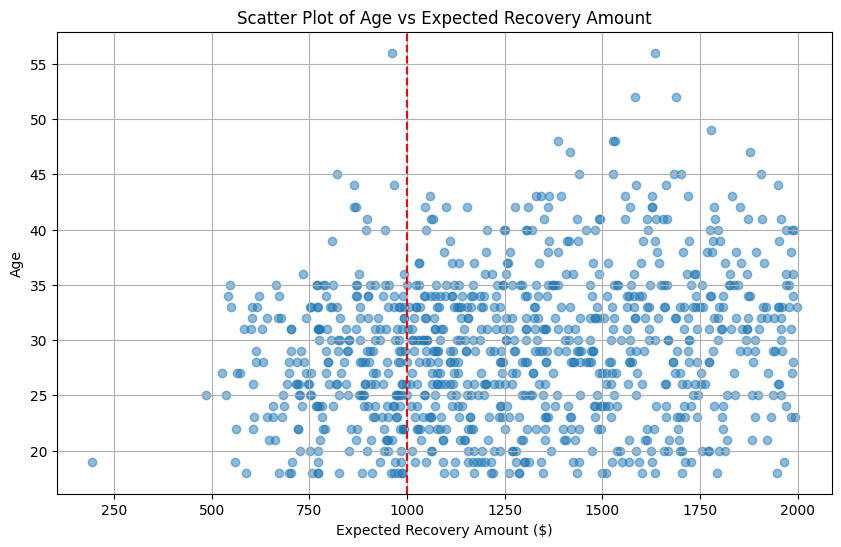

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("bank_data.csv")
filtered_data = data[(data['expected_recovery_amount'] >= 0) & (data['expected_recovery_amount'] <= 2000)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['age'], alpha=0.5)
plt.axvline(x = 1000, color ="red", linestyle="--", label="Threshold")
plt.title('Scatter Plot of Age vs Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Age')
plt.grid(True)
plt.show()

**Performing Kruskal Test**

In [2]:
from scipy.stats import kruskal

expected_recovery_amount = np.array(data["expected_recovery_amount"])
ages = np.array(data["age"])

ages_below_threshold = ages[(expected_recovery_amount >= 900) & (expected_recovery_amount < 1000)]
ages_above_threshold = ages[(expected_recovery_amount > 1000) & (expected_recovery_amount <= 1100)]

statistic, p_value = kruskal(ages_below_threshold, ages_above_threshold)

print("Kruskal-Wallis Statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if(p_value <= alpha):
  print("significant difference in average age btw the two groups")
else:
  print("No significant difference in average age btw the two groups")


Kruskal-Wallis Statistic: 3.1596647465950647
p-value: 0.07547868225791671
No significant difference in average age btw the two groups


 **Scatter Plot Sex Vs Expected Recovery Amount**

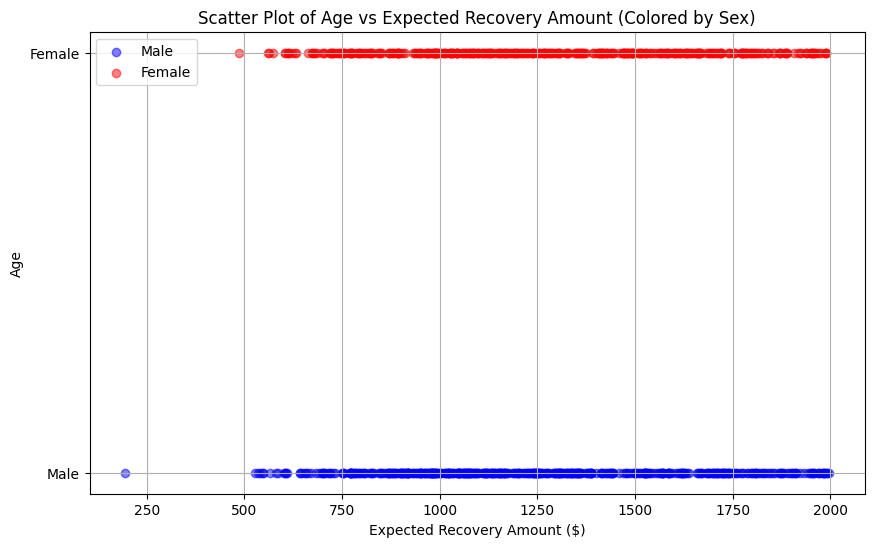

In [3]:
filtered_data = data[(data['expected_recovery_amount'] >= 0) & (data['expected_recovery_amount'] <= 2000)]

# Create a scatter plot with different colors for male and female
plt.figure(figsize=(10, 6))

# Create separate scatter plots for male and female data points
plt.scatter(
    filtered_data[filtered_data['sex'] == 'Male']['expected_recovery_amount'],
    filtered_data[filtered_data['sex'] == 'Male']['sex'],
    alpha=0.5,
    label='Male',
    color='blue'
)

plt.scatter(
    filtered_data[filtered_data['sex'] == 'Female']['expected_recovery_amount'],
    filtered_data[filtered_data['sex'] == 'Female']['sex'],
    alpha=0.5,
    label='Female',
    color='red'
)

plt.title('Scatter Plot of Age vs Expected Recovery Amount (Colored by Sex)')
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Age')
plt.grid(True)
plt.legend()
plt.show()


**Carrying out Two-sample Proportion test**

In [4]:

import statsmodels.api as sm
males_below_threshold = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1000) & (data['sex'] == 'Male')]
males_above_threshold = data[(data['expected_recovery_amount'] >= 1000) & (data['expected_recovery_amount'] <= 1100) & (data['sex'] == 'Male')]

sex_below_threshold = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1000)]
sex_above_threshold = data[(data['expected_recovery_amount'] >= 1000) & (data['expected_recovery_amount'] <= 1100)]

# Performing two-sample proportion test
z_score, p_value = sm.stats.proportions_ztest([len(males_below_threshold), len(males_above_threshold)],
                                                    [len(sex_below_threshold), len(sex_above_threshold)])
print("Z-Score:", z_score)
print("p-value:", p_value)

P_threshold = 0.05
if p_value < P_threshold:
    print("There is a significant difference in the percentage of males below and above the threshold.")
else:
    print("There is no significant difference in the percentage of males below and above the threshold.")


Z-Score: 0.7961036157477119
p-value: 0.4259718127420584
There is no significant difference in the percentage of males below and above the threshold.


**Actual Recovery Amount Vs Expected Recovery Amount**

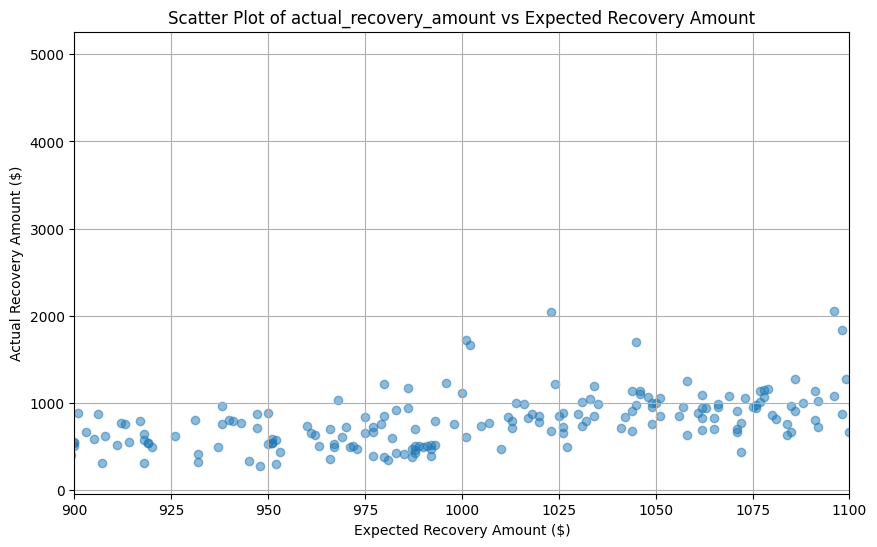

In [5]:
#scatter plot of actual_recovery_amount vs Expected Recovery Amount
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['actual_recovery_amount'], alpha=0.5)
plt.title('Scatter Plot of actual_recovery_amount vs Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Actual Recovery Amount ($)')
plt.xlim(900, 1100)
plt.grid(True)
plt.show()

**Carrying out Kruskal-Wallis test**

In [7]:
expected_recovery_amount = np.array(data["expected_recovery_amount"])
actual_recovery_amount = np.array(data["actual_recovery_amount"])

# Getting actual recovery amounts for the wide range 1100
actual_below_threshold_wide = actual_recovery_amount[(expected_recovery_amount >= 900) & (expected_recovery_amount < 1000)]
actual_above_threshold_wide = actual_recovery_amount[(expected_recovery_amount > 1000) & (expected_recovery_amount <= 1100)]

# Getting actual recovery amounts for the narrow range 1050
actual_below_threshold_narrow = actual_recovery_amount[(expected_recovery_amount >= 950) & (expected_recovery_amount < 1000)]
actual_above_threshold_narrow = actual_recovery_amount[(expected_recovery_amount > 1000) & (expected_recovery_amount <= 1050)]

statistic_wide, p_value_wide = kruskal(actual_below_threshold_wide, actual_above_threshold_wide)
statistic_narrow, p_value_narrow = kruskal(actual_below_threshold_narrow, actual_above_threshold_narrow)

print("Kruskal-Wallis Statistic for (1100) range:", statistic_wide)
print("p-value:", p_value_wide)
print("Kruskal-Wallis Statistic for (1050) range:", statistic_narrow)
print("p-value:", p_value_narrow)

P_threshold = 0.05

if(p_value_wide <= P_threshold):
  print("There is a significant difference in the average of actual recovery amounts below and above the threshold")
else:
  print("There is no significant difference in the average of actual recovery amounts below and above the threshold")

if(p_value_narrow <= P_threshold):
  print("There is a significant difference in the average of actual recovery amounts below and above the threshold")
else:
  print("There is no significant difference in the average of actual recovery amounts below and above the threshold")

Kruskal-Wallis Statistic for (1100) range: 67.38392708550032
p-value: 2.2346330990871586e-16
Kruskal-Wallis Statistic for (1050) range: 33.0431604938272
p-value: 9.013556650854467e-09
There is a significant difference in the average of actual recovery amounts below and above the threshold
There is a significant difference in the average of actual recovery amounts below and above the threshold


**Two different windows of the expected recovery amount**

In [9]:
#two different windows of the expected recovery amount $900 to $1100 and for a narrow range of $950 to $1050 to see if our results are consistent.
import pandas as pd
import statsmodels.api as sm


# Define your threshold
threshold = 1000

# Define the two windows
window1 = (900, 1100)
window2 = (950, 1050)

# Filter data for each window
data_window1 = data[(data['expected_recovery_amount'] >= window1[0]) & (data['expected_recovery_amount'] <= window1[1])]
data_window2 = data[(data['expected_recovery_amount'] >= window2[0]) & (data['expected_recovery_amount'] <= window2[1])]

# Create indicator variables for above and below the threshold
data_window1['Above Threshold'] = (data_window1['expected_recovery_amount'] > threshold).astype(int)
data_window2['Above Threshold'] = (data_window2['expected_recovery_amount'] > threshold).astype(int)

# RDD Analysis for Window 1
X1 = sm.add_constant(data_window1[['expected_recovery_amount', 'Above Threshold']])
model1 = sm.OLS(data_window1['actual_recovery_amount'], X1).fit()
print(model1.summary())

# RDD Analysis for Window 2
X2 = sm.add_constant(data_window2[['expected_recovery_amount', 'Above Threshold']])
model2 = sm.OLS(data_window2['actual_recovery_amount'], X2).fit()
print(model2.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.298
Model:                                OLS   Adj. R-squared:                  0.290
Method:                     Least Squares   F-statistic:                     38.44
Date:                    Tue, 22 Aug 2023   Prob (F-statistic):           1.22e-14
Time:                            10:44:35   Log-Likelihood:                -1280.7
No. Observations:                     184   AIC:                             2567.
Df Residuals:                         181   BIC:                             2577.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<ipython-input-9-181a9899a10a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_window1['Above Threshold'] = (data_window1['expected_recovery_amount'] > threshold).astype(int)
<ipython-input-9-181a9899a10a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_window2['Above Threshold'] = (data_window2['expected_recovery_amount'] > threshold).astype(int)


**Regression Modeling: No threshold**

In [10]:
#no threshold
y = data['actual_recovery_amount']
X = data['expected_recovery_amount']

# Add a constant term (intercept) to the model
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the model
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                            10:44:45   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

**Regression Modeling: True threshold 900-1000**

In [11]:
#with threshold 900-1000
y = data_window1['actual_recovery_amount']
X = data_window1[['expected_recovery_amount', 'Above Threshold']]

# Add a constant term (intercept) to the model
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the model
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.298
Model:                                OLS   Adj. R-squared:                  0.290
Method:                     Least Squares   F-statistic:                     38.44
Date:                    Tue, 22 Aug 2023   Prob (F-statistic):           1.22e-14
Time:                            10:44:48   Log-Likelihood:                -1280.7
No. Observations:                     184   AIC:                             2567.
Df Residuals:                         181   BIC:                             2577.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

**predicting the impact and predicting the confidence level 900-1000**

In [12]:
#predicting the impact and predicting the confidence level

import statsmodels.api as sm
import statsmodels.formula.api as smf
data_window1['expected_recovery_amount'] = (data_window1['actual_recovery_amount'] >= threshold).astype(int)

model_rdd = smf.ols(formula='actual_recovery_amount ~ expected_recovery_amount', data=data_window1).fit()

impact_estimate = model_rdd.params['expected_recovery_amount']

# Extract the standard error of the coefficient
standard_error = model_rdd.bse['expected_recovery_amount']

# Calculate the 95% confidence interval
conf_int_lower = impact_estimate - 1.96 * standard_error  # Lower bound
conf_int_upper = impact_estimate + 1.96 * standard_error  # Upper bound

# Print the results
print(f'Impact of expected_recovery_amount: {impact_estimate:.2f}')
print(f'95% Confidence Interval: ({conf_int_lower:.2f}, {conf_int_upper:.2f})')


Impact of expected_recovery_amount: 553.71
95% Confidence Interval: (476.55, 630.87)


<ipython-input-12-a77c6b157cca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_window1['expected_recovery_amount'] = (data_window1['actual_recovery_amount'] >= threshold).astype(int)


**Regression Modeling: True threshold 950-1050**

In [13]:
#with threshold for 950-1050
y = data_window2['actual_recovery_amount']
X = data_window2[['expected_recovery_amount', 'Above Threshold']]

# Add a constant term (intercept) to the model
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the model
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Tue, 22 Aug 2023   Prob (F-statistic):           2.42e-07
Time:                            10:44:51   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

**predicting the impact and predicting the confidence level 950-1050**

In [14]:
#predicting the impact and predicting the confidence level
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_window2['expected_recovery_amount'] = (data_window2['actual_recovery_amount'] >= threshold).astype(int)

model_rdd = smf.ols(formula='actual_recovery_amount ~ expected_recovery_amount', data=data_window2).fit()

impact_estimate = model_rdd.params['expected_recovery_amount']

# Extract the standard error of the coefficient
standard_error = model_rdd.bse['expected_recovery_amount']

# Calculate the 95% confidence interval
conf_int_lower = impact_estimate - 1.96 * standard_error  # Lower bound
conf_int_upper = impact_estimate + 1.96 * standard_error  # Upper bound

# Print the results
print(f'Impact of expected_recovery_amount: {impact_estimate:.2f}')
print(f'95% Confidence Interval: ({conf_int_lower:.2f}, {conf_int_upper:.2f})')


Impact of expected_recovery_amount: 595.65
95% Confidence Interval: (490.92, 700.38)


<ipython-input-14-0dae8a92cb0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_window2['expected_recovery_amount'] = (data_window2['actual_recovery_amount'] >= threshold).astype(int)
